# Investigation of AA+FMN 
FMN added to AA suite

In [19]:
from logging_ import Logger
import matplotlib.pyplot as plt
import pandas as pd

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
logger = Logger(logs_dir="logs_art_add_fmn_to_aa")

In [21]:
logger.load_all()

# Metrics

In [22]:
report = logger.report()
report.reset_index(drop=True)

,dataset,norm,model,attack,steps,params,median,n_qs,asr
0,CIFAR10,Linf,Rade2021Helper_R18_extra,aa,2,-eps-0.031373-loss_f-DL,inf,0.0,30.167598
1,CIFAR10,L2,Rade2021Helper_R18_ddpm,aa,2,-eps-0.75-loss_f-DL,inf,0.0,24.590164
2,CIFAR10,Linf,Rebuffi2021Fixing_70_16_cutmix_extra_linf,fmn,1001,-binary_search_steps-10-loss_f-DL-steps-1000-α...,0.048344,18.0,100.000000
3,CIFAR10,L1,Engstrom2019Robustness_l2,aa,2,-eps-12.0-loss_f-DL,12.000000,1.0,70.329669
4,CIFAR10,Linf,Gowal2020Uncovering_70_16_extra,fmn,101,-binary_search_steps-10-loss_f-DL-steps-100-α_...,0.050001,19.0,100.000000
...,...,...,...,...,...,...,...,...,...
105,CIFAR10,Linf,Rade2021Helper_R18_extra,aa,2,-eps-0.047059-loss_f-DL,0.047059,1.0,57.541901
106,CIFAR10,L2,Rebuffi2021Fixing_70_16_cutmix_ddpm,fmn,1001,-binary_search_steps-10-loss_f-DL-steps-1000-α...,1.155430,16.0,100.000000
107,CIFAR10,Linf,Rade2021Helper_R18_extra,aa,2,-eps-0.039216-loss_f-DL,inf,0.0,43.016762
108,CIFAR10,L2,Rade2021Helper_R18_ddpm,aa,2,-eps-1.0-loss_f-DL,inf,0.0,39.890712


In [69]:
report[report.model == "Engstrom2019Robustness_linf"]

,dataset,norm,model,attack,steps,params,rob_acc
7,CIFAR10,L1,Engstrom2019Robustness_linf,aa,2,-eps-18.0-loss_f-DL,0.905
8,CIFAR10,L1,Engstrom2019Robustness_linf,fmn,101,-binary_search_steps-10-loss_f-DL-steps-100-α_...,0.320
20,CIFAR10,L1,Engstrom2019Robustness_linf,aa,2,-eps-10.0-loss_f-DL,0.905
28,CIFAR10,L1,Engstrom2019Robustness_linf,aa,2,-eps-12.0-loss_f-DL,0.905
34,CIFAR10,L1,Engstrom2019Robustness_linf,fmn,1001,-binary_search_steps-10-loss_f-DL-steps-1000-α...,0.315
40,CIFAR10,L1,Engstrom2019Robustness_linf,aa,2,-eps-8.0-loss_f-DL,0.170
45,CIFAR10,L1,Engstrom2019Robustness_linf,ensemble,1001,-steps-1001,0.000


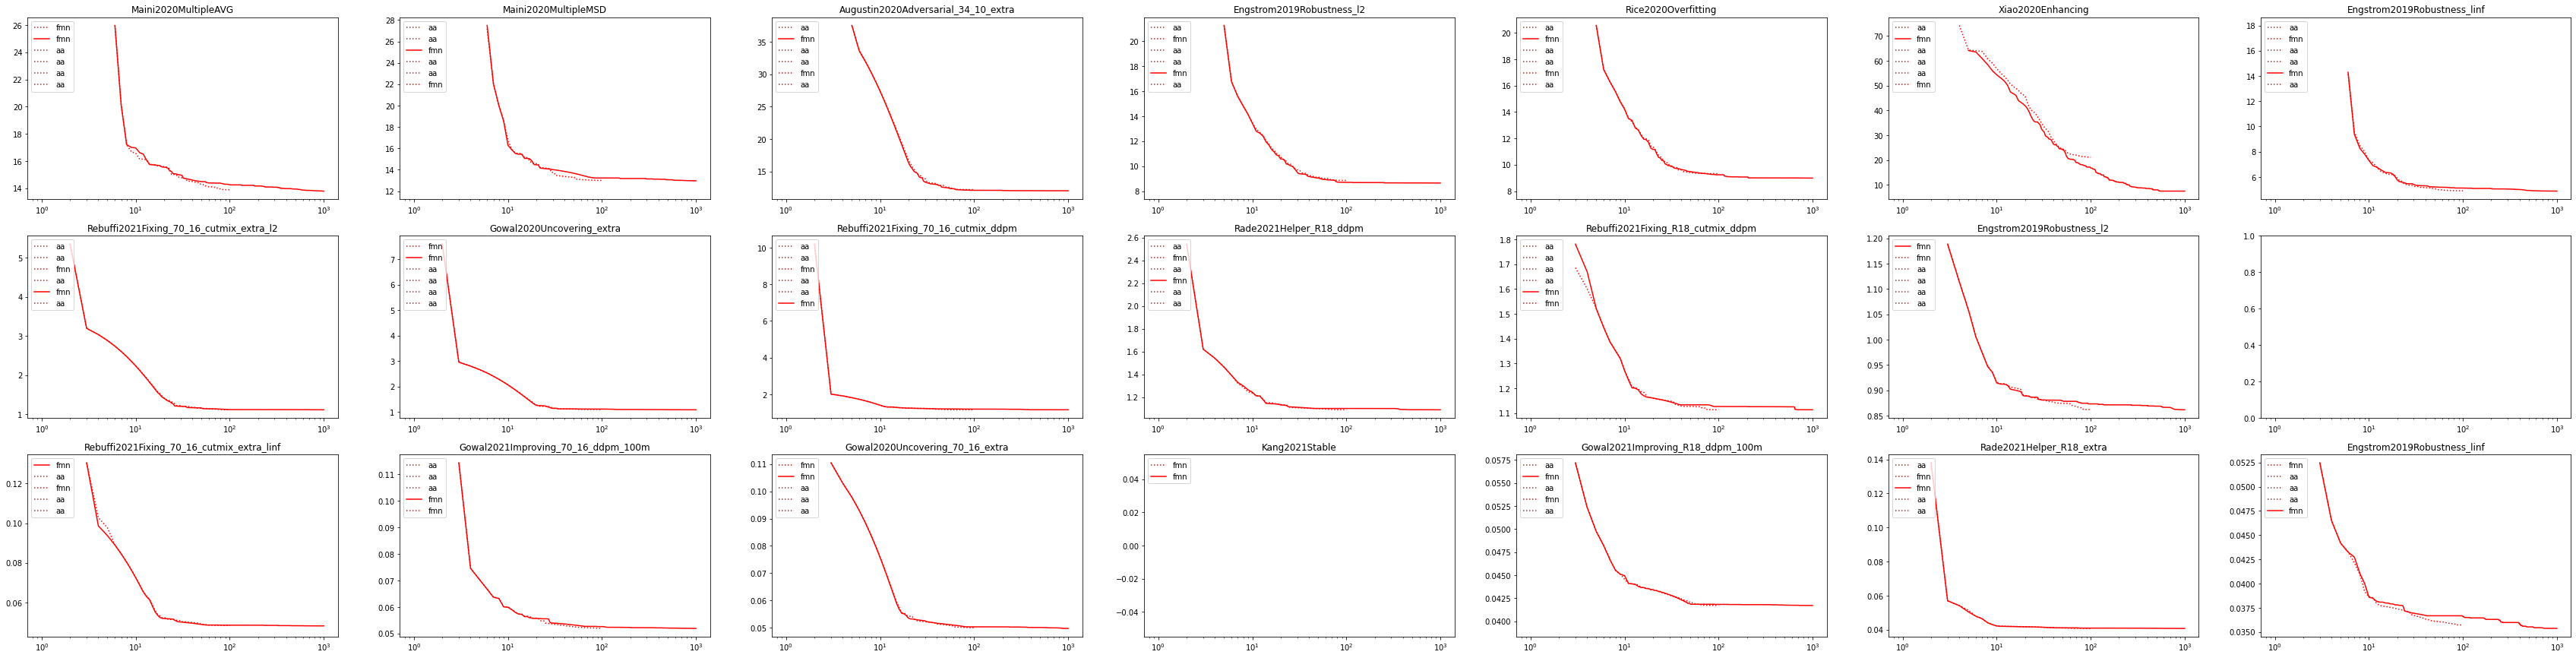

In [23]:
logger.plot_QD_grid(figsize=(60,15))

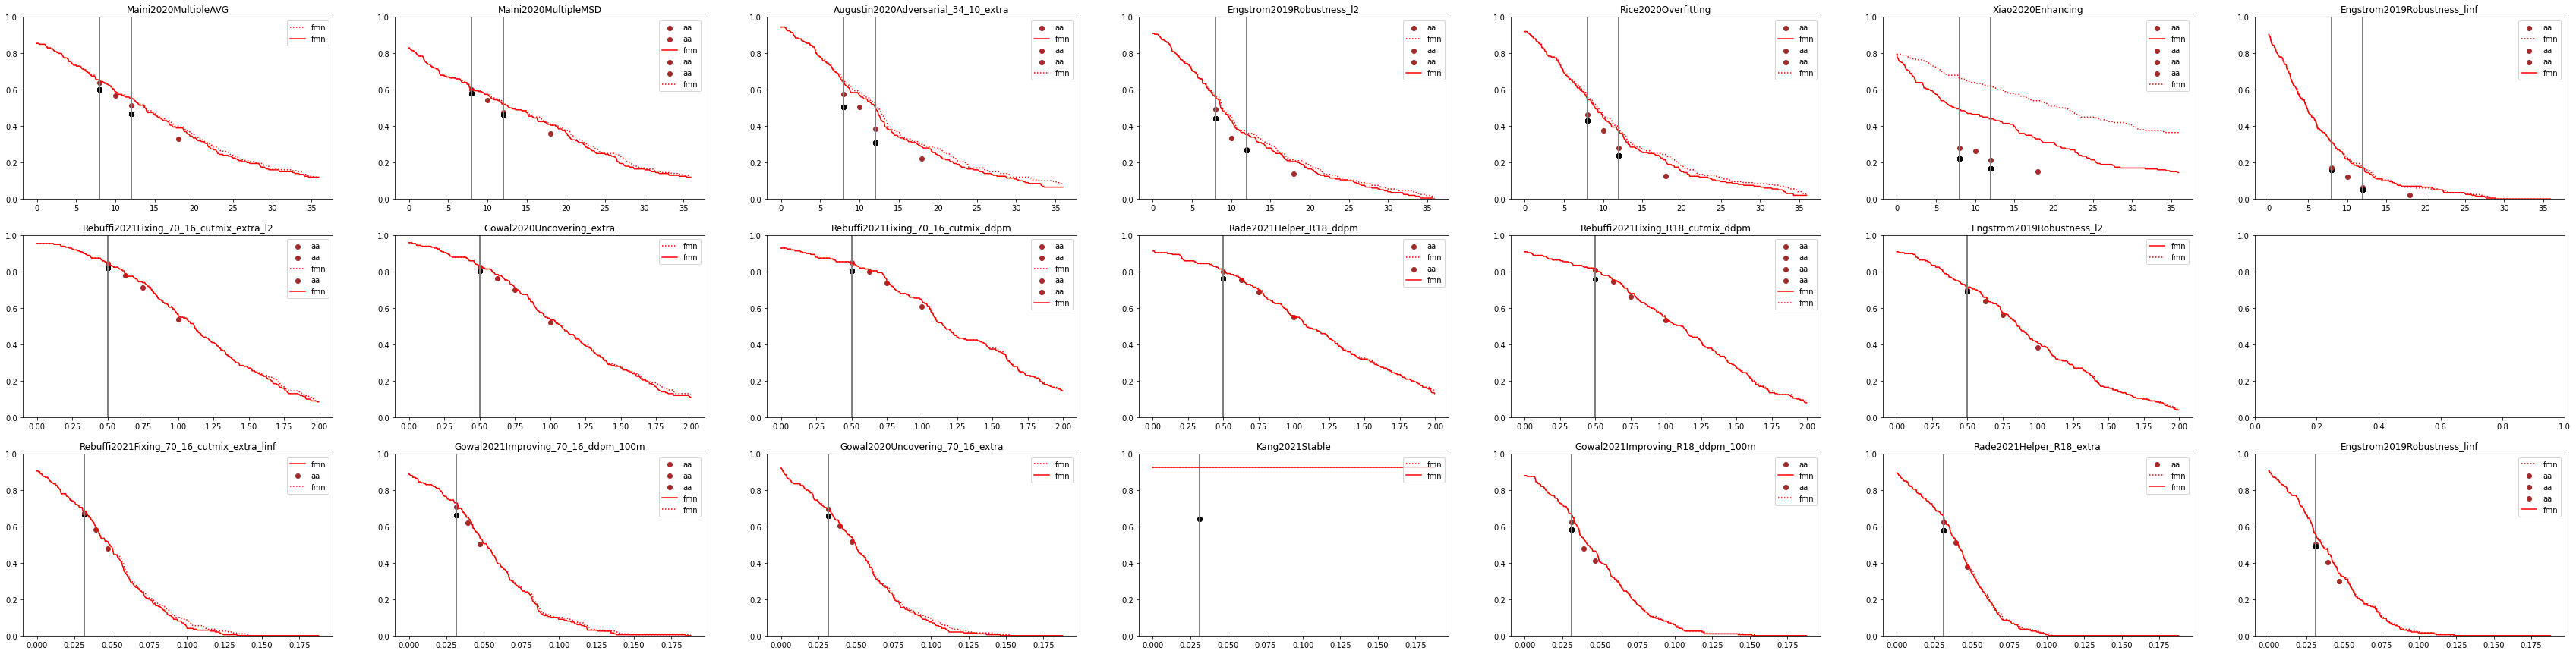

In [24]:
logger.plot_SE_grid(figsize=(60,15))

# add FMN to AA

In [34]:
from scores import SCORES

norm = "L1"
## add ensemble for L1:
for model_name in SCORES[norm][0]:
    if "Xiao" in model_name:
        continue
    run_ids = list(logger.where(model=model_name).keys())
    logger.merge(f"dataset-CIFAR10-norm-{norm}-attack-ensemble-model-{model_name}-steps-1001", run_ids)    

In [36]:
from scores import SCORES

norm = "L2"
## add ensemble for L1:
for model_name in SCORES[norm][0]:
    if "Xiao" in model_name:
        continue
    run_ids = list(logger.where(model=model_name).keys())
    logger.merge(f"dataset-CIFAR10-norm-{norm}-attack-ensemble-model-{model_name}-steps-1001", run_ids)    

In [38]:
from scores import SCORES

norm = "Linf"
## add ensemble for L1:
for model_name in SCORES[norm][0]:
    if "Xiao" in model_name:
        continue
    run_ids = list(logger.where(model=model_name).keys())
    logger.merge(f"dataset-CIFAR10-norm-{norm}-attack-ensemble-model-{model_name}-steps-1001", run_ids)    

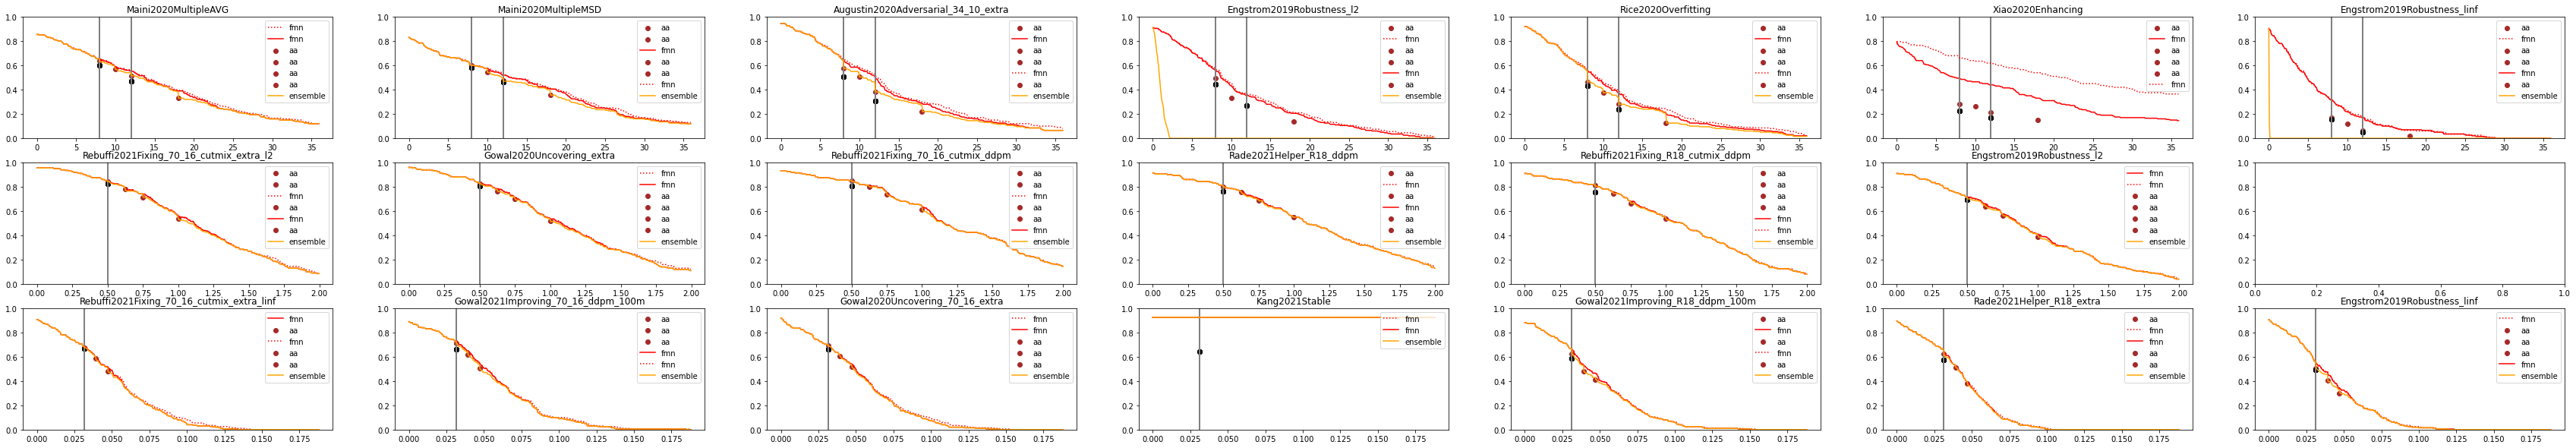

In [39]:
logger.plot_SE_grid(where_settings={}, figsize=(60,10))

In [80]:
report = logger.report_ra(logger.where(norm="Linf"), eps=8/255+0.00001)
report.groupby(["model", "attack"])["rob_acc"].min()

model                                      attack  
Engstrom2019Robustness_linf                aa          0.505
                                           ensemble    0.505
                                           fmn         0.550
Gowal2020Uncovering_70_16_extra            aa          0.695
                                           ensemble    0.695
                                           fmn         0.695
Gowal2021Improving_70_16_ddpm_100m         aa          0.710
                                           ensemble    0.710
                                           fmn         0.730
Gowal2021Improving_R18_ddpm_100m           aa          0.625
                                           ensemble    0.625
                                           fmn         0.660
Kang2021Stable                             ensemble    0.925
                                           fmn         0.925
Rade2021Helper_R18_extra                   aa          0.625
                                 

In [81]:
print("Improvement in rob_acc over plain AA:")
report[report.attack == "aa"].groupby(["model"])["rob_acc"].min() - report.groupby(["model"])["rob_acc"].min()

Improvement in rob_acc over plain AA:


model
Engstrom2019Robustness_linf                  0.0
Gowal2020Uncovering_70_16_extra              0.0
Gowal2021Improving_70_16_ddpm_100m           0.0
Gowal2021Improving_R18_ddpm_100m             0.0
Kang2021Stable                               NaN
Rade2021Helper_R18_extra                     0.0
Rebuffi2021Fixing_70_16_cutmix_extra_linf    0.0
Name: rob_acc, dtype: float64

In [84]:
print("AA advantage over FMN")
report[report.attack == "fmn"].groupby(["model"])["rob_acc"].min() - report[report.attack == "aa"].groupby(["model"])["rob_acc"].min()

AA advantage over FMN


model
Engstrom2019Robustness_linf                  0.045
Gowal2020Uncovering_70_16_extra              0.000
Gowal2021Improving_70_16_ddpm_100m           0.020
Gowal2021Improving_R18_ddpm_100m             0.035
Kang2021Stable                                 NaN
Rade2021Helper_R18_extra                     0.025
Rebuffi2021Fixing_70_16_cutmix_extra_linf    0.010
Name: rob_acc, dtype: float64

In [62]:
report = logger.report_ra(logger.where(norm="L2"), eps=0.5+ 0.00001)
report.groupby(["model", "attack"])["rob_acc"].min()

model                                    attack  
Engstrom2019Robustness_l2                aa          0.700
                                         ensemble    0.700
                                         fmn         0.715
Gowal2020Uncovering_extra                aa          0.825
                                         ensemble    0.825
                                         fmn         0.835
Rade2021Helper_R18_ddpm                  aa          0.800
                                         ensemble    0.800
                                         fmn         0.800
Rebuffi2021Fixing_70_16_cutmix_ddpm      aa          0.850
                                         ensemble    0.850
                                         fmn         0.850
Rebuffi2021Fixing_70_16_cutmix_extra_l2  aa          0.845
                                         ensemble    0.845
                                         fmn         0.850
Rebuffi2021Fixing_R18_cutmix_ddpm        aa          0.810
      

In [63]:
print("Improvement in rob_acc over plain AA:")
report[report.attack == "aa"].groupby(["model"])["rob_acc"].min() - report.groupby(["model"])["rob_acc"].min()

Improvement in rob_acc over plain AA:


model
Engstrom2019Robustness_l2                  0.0
Gowal2020Uncovering_extra                  0.0
Rade2021Helper_R18_ddpm                    0.0
Rebuffi2021Fixing_70_16_cutmix_ddpm        0.0
Rebuffi2021Fixing_70_16_cutmix_extra_l2    0.0
Rebuffi2021Fixing_R18_cutmix_ddpm          0.0
Name: rob_acc, dtype: float64

In [64]:
print("AA advantage over FMN")
report[report.attack == "fmn"].groupby(["model"])["rob_acc"].min() - report[report.attack == "aa"].groupby(["model"])["rob_acc"].min()

AA advantage over FMN


model
Engstrom2019Robustness_l2                  0.015
Gowal2020Uncovering_extra                  0.010
Rade2021Helper_R18_ddpm                    0.000
Rebuffi2021Fixing_70_16_cutmix_ddpm        0.000
Rebuffi2021Fixing_70_16_cutmix_extra_l2    0.005
Rebuffi2021Fixing_R18_cutmix_ddpm          0.000
Name: rob_acc, dtype: float64

In [65]:
report = logger.report_ra(logger.where(norm="L1"), eps=8+ 0.00001)
report.groupby(["model", "attack"])["rob_acc"].min()

model                                attack  
Augustin2020Adversarial_34_10_extra  aa          0.575
                                     ensemble    0.575
                                     fmn         0.640
Engstrom2019Robustness_l2            aa          0.495
                                     ensemble    0.000
                                     fmn         0.555
Engstrom2019Robustness_linf          aa          0.170
                                     ensemble    0.000
                                     fmn         0.315
Maini2020MultipleAVG                 aa          0.640
                                     ensemble    0.630
                                     fmn         0.645
Maini2020MultipleMSD                 aa          0.600
                                     ensemble    0.600
                                     fmn         0.600
Rice2020Overfitting                  aa          0.465
                                     ensemble    0.465
                   

In [66]:
print("Improvement in rob_acc over plain AA:")
report[report.attack == "aa"].groupby(["model"])["rob_acc"].min() - report.groupby(["model"])["rob_acc"].min()

Improvement in rob_acc over plain AA:


model
Augustin2020Adversarial_34_10_extra    0.000
Engstrom2019Robustness_l2              0.495
Engstrom2019Robustness_linf            0.170
Maini2020MultipleAVG                   0.010
Maini2020MultipleMSD                   0.000
Rice2020Overfitting                    0.000
Xiao2020Enhancing                      0.000
Name: rob_acc, dtype: float64

In [57]:
print("AA advantage over FMN")
report[report.attack == "fmn"].groupby(["model"])["rob_acc"].min() - report[report.attack == "aa"].groupby(["model"])["rob_acc"].min()

FMN vs AA


model
Augustin2020Adversarial_34_10_extra    0.065
Engstrom2019Robustness_l2              0.060
Engstrom2019Robustness_linf            0.145
Maini2020MultipleAVG                   0.005
Maini2020MultipleMSD                   0.000
Rice2020Overfitting                    0.085
Xiao2020Enhancing                      0.210
Name: rob_acc, dtype: float64